# Task 3 

## Codsoft internship - Syed Taimoor Salim

# Importing Libraries

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Data 

In [2]:
# read data
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Pre Processing of Data

## Data Facts

In [3]:
# figure out the number of rows and columns in the dataframe
df.shape

(150, 5)

In [4]:
# check out info on the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# check for any missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# show statistics of the dataframe
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# replace strings with numericals for simplicity in model training
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Explonatory Data Analysis (EDA)

### i. Species Measurements Correlation

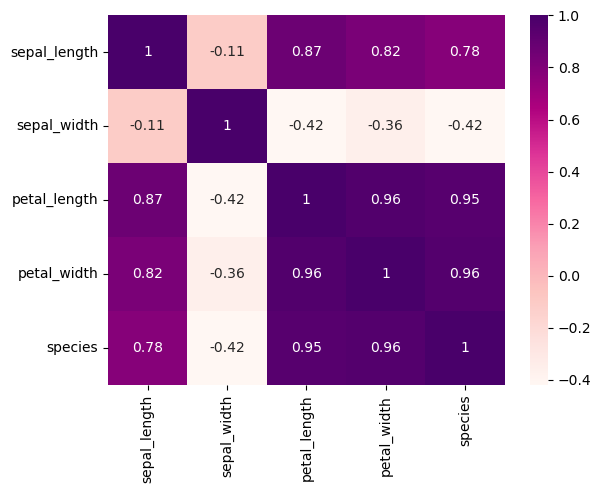

In [8]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="RdPu", annot=True)
# displaying heatmap
plt.show()

### ii. Pairwise Feature Correlation (Excluding Species)

<Figure size 400x300 with 0 Axes>

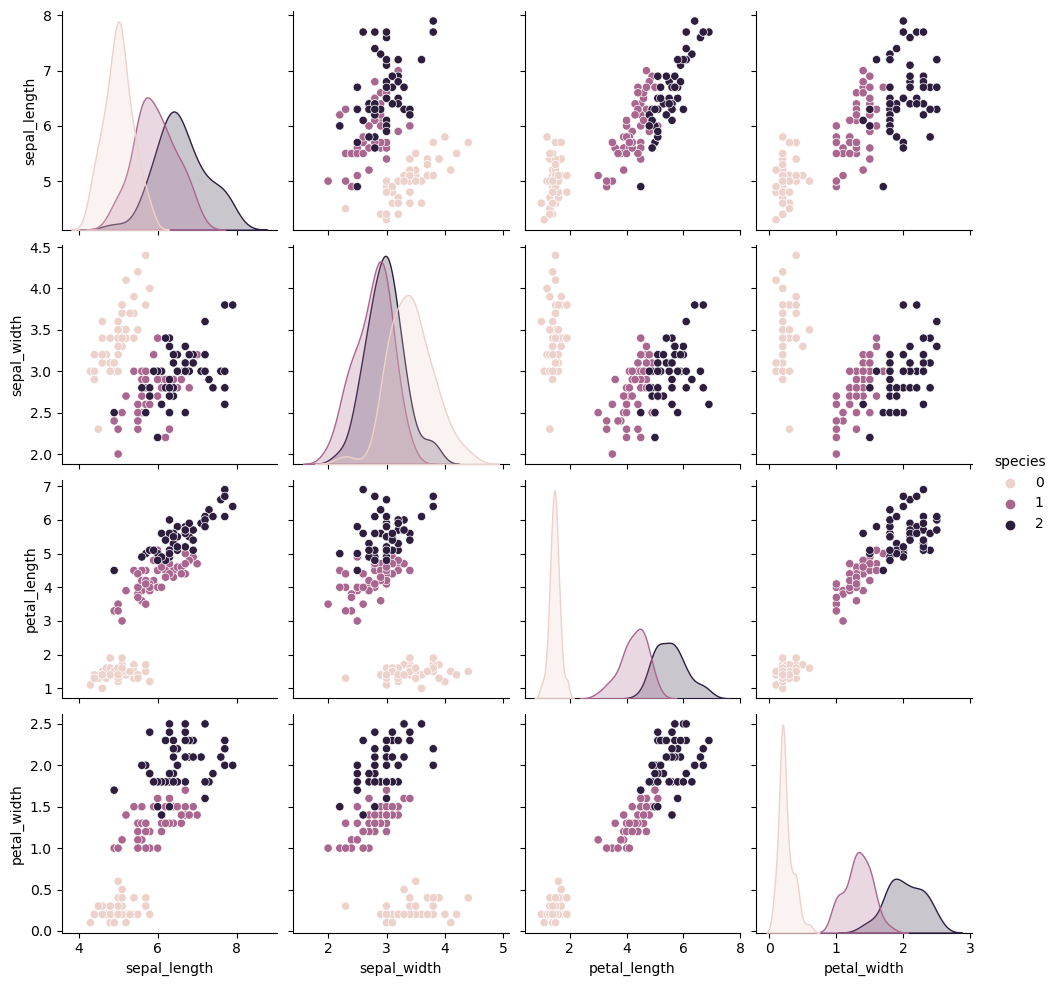

In [9]:
# show the relation between each column excep species which lies on top of each visualization
plt.figure(figsize=(4, 3))
sns.pairplot(df, hue='species')
plt.show()

### iii. Sepal Length Distribution Analysis

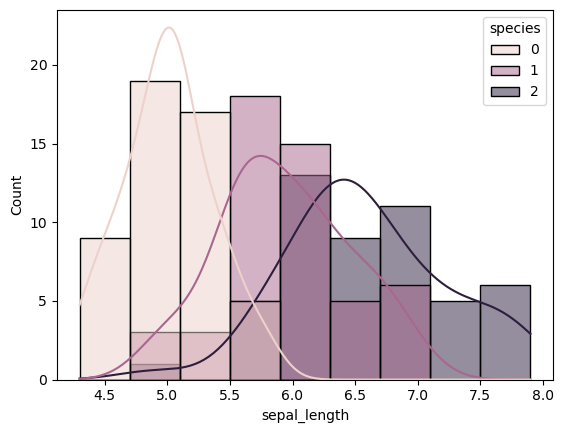

In [10]:
# create histogram of sepal_length with species on top of it
sns.histplot(data=df, x='sepal_length', kde=True, hue='species')
plt.show()

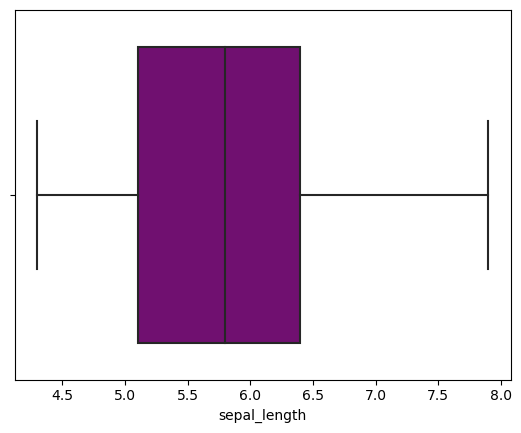

In [11]:
# create box plot to show distribution of data in sepal_length column
sns.boxplot(data=df, x='sepal_length', color = 'Purple')
plt.show()

### iv. Sepal Width Distribution Analysis

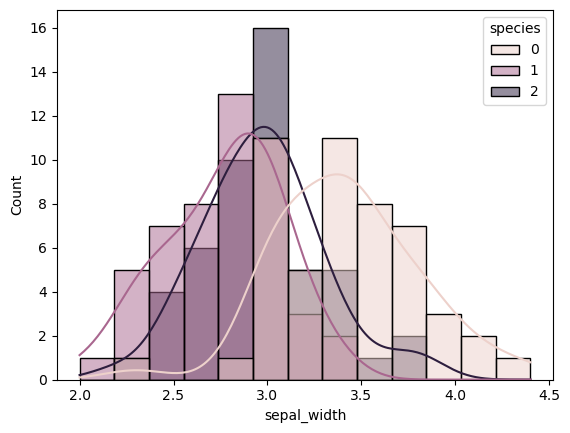

In [12]:
# create histogram of sepal_width with species on top of it
sns.histplot(data=df, x='sepal_width', kde=True, hue='species')
plt.show()

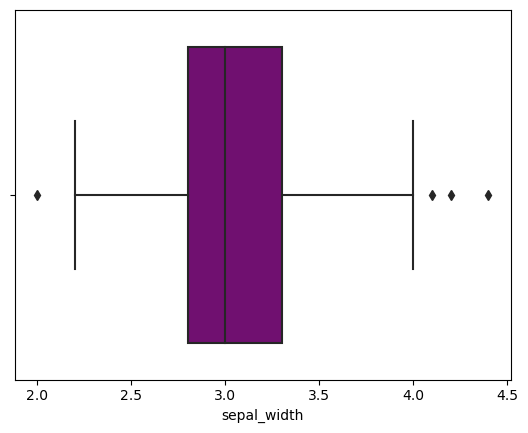

In [13]:
# create box plot to show distribution of data in sepal_width column
sns.boxplot(data=df, x='sepal_width', color = 'Purple')
plt.show()

### v. Petal Length Distribution Analysis

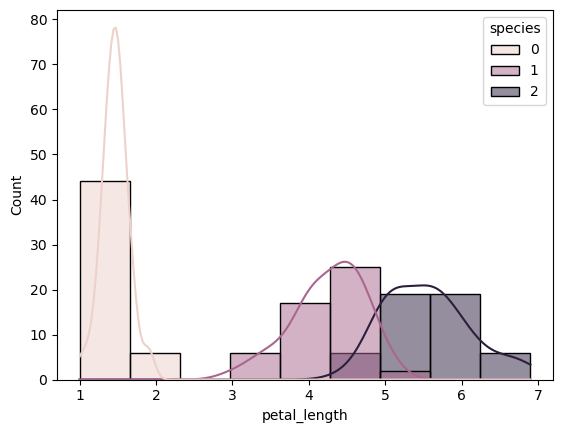

In [14]:
# create histogram of petal_length with species on top of it
sns.histplot(data=df, x='petal_length', kde=True, hue='species')
plt.show()

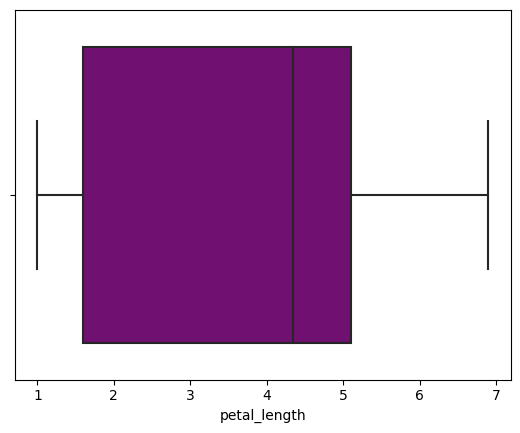

In [15]:
# create box plot to show distribution of data in petal_length column
sns.boxplot(data=df, x='petal_length', color = 'Purple')
plt.show()


### vi. Petal Width Distribution Analysis

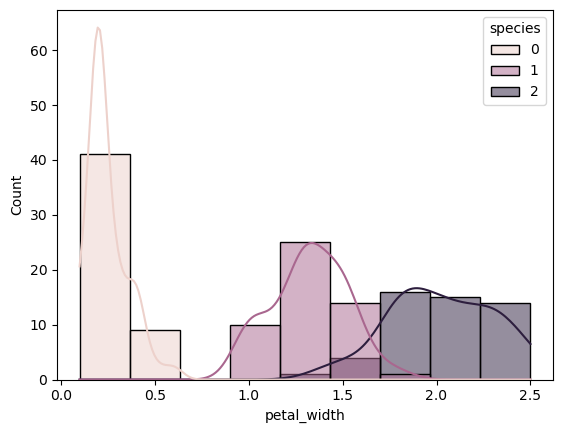

In [16]:
# create histogram of petal_width with species on top of it
sns.histplot(data=df, x='petal_width', kde=True, hue='species')
plt.show()

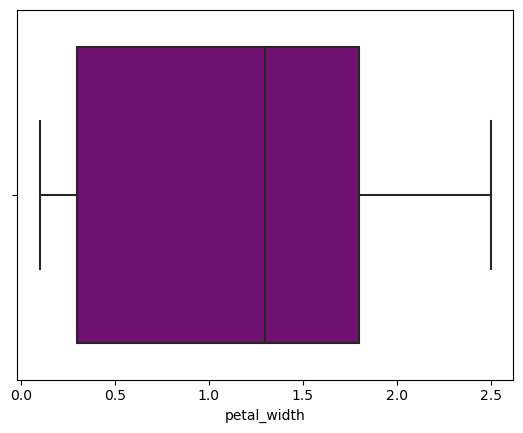

In [17]:
# create box plot to show distribution of data in petal_width column
sns.boxplot(data=df, x='petal_width', color = 'Purple')
plt.show()


### vii. Count of Species in Dataframe

<AxesSubplot:xlabel='species', ylabel='count'>

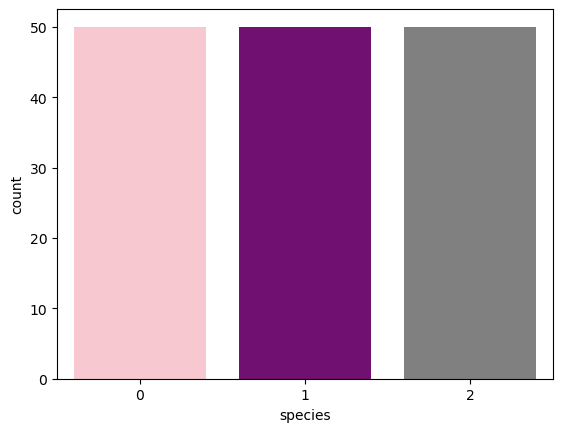

In [18]:
# show histogram to show how many entries lie for each species in the dataframe
custom_palette = ["Pink", "Purple", "Gray"]
sns.countplot(x = df['species'] , data = df, palette = custom_palette)

# Data Modelling

we explore various machine learning models to classify Iris flowers based on their sepal and petal measurements. Each of the following techniques offers a unique approach to this classification task:

In [19]:
# creating target and learning variables
X = df[["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]]
y = df["species"]

# splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [20]:
#i. Linear Regression

LR = LogisticRegression(max_iter=200)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 97.78%


C:\Users\mrmar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mrmar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mrmar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mrmar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

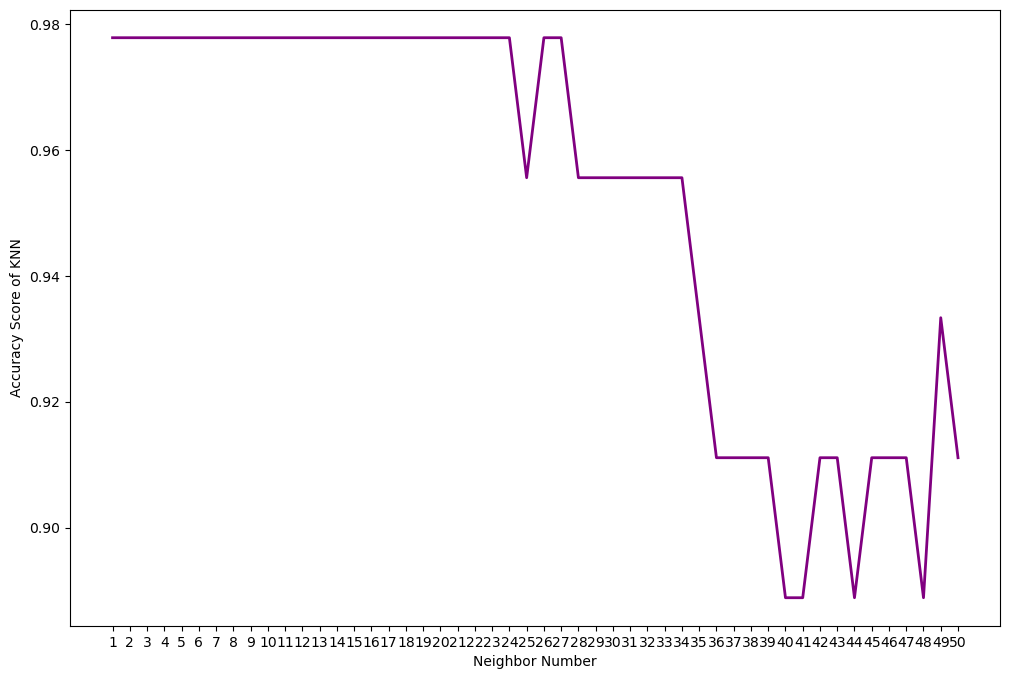

In [21]:
#ii. K Nearest Neighbors

# Creating lists to store accuracy scores for different n_neighbors values
k_range = range(1, 51)
accuracy_scores = []

# Iterate through different values of n_neighbors
for k in k_range:
    # Create a KNN classifier with the current value of n_neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn_classifier.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(12,8))
# create a line graph for showing accuracy score (scores_list) for respective number of neighbors used in the KNN model
plt.plot(k_range, accuracy_scores, linewidth=2, color='purple')
# values for x-axis should be the number of neighbors stored in kRange
plt.xticks(k_range)
plt.xlabel('Neighbor Number')
plt.ylabel('Accuracy Score of KNN')
plt.show()

In [22]:
# Find the best value of n_neighbors with the highest accuracy
best_k = k_range[accuracy_scores.index(max(accuracy_scores))]
best_accuracy = max(accuracy_scores)

print(f"Best number of neighbors: {best_k}")
print(f"Highest accuracy: {best_accuracy}")

Best number of neighbors: 1
Highest accuracy: 0.9777777777777777


In [23]:
# Creating a KNN model with best parameters i.e., number of neighbors = 23
classifier_knn = KNeighborsClassifier(n_neighbors = 1)

# fit training data to the KNN model
classifier_knn.fit(X_train,y_train)
# evaluate test data on the model
pred = classifier_knn.predict(X_test)
# show regression score
KNNAcc = accuracy_score(y_test, pred)
print('K-Nearest Neighbors Classifier accuracy: {:.2f}%'.format(KNNAcc*100))

K-Nearest Neighbors Classifier accuracy: 97.78%


C:\Users\mrmar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
#iii. Decision Tree Classifier

# create a decision tree classifier object
dt = DecisionTreeClassifier()
# train the model on the training dataset
dt.fit(X_train, y_train)
# make predictions on the test data
y_pred = dt.predict(X_test)
# calculate accuracy
DTCAcc = accuracy_score(y_test, y_pred)
print('Decision Tree Classifier accuracy: {:.2f}%'.format(KNNAcc*100))
# create a decision tree classifier object
dt = DecisionTreeClassifier()
# train the model on the training dataset
dt.fit(X_train, y_train)
# make predictions on the test data
y_pred = dt.predict(X_test)
# calculate accuracy
DTCAcc = accuracy_score(y_test, y_pred)
print('Decision Tree Classifier accuracy: {:.2f}%'.format(KNNAcc*100))

Decision Tree Classifier accuracy: 97.78%
Decision Tree Classifier accuracy: 97.78%


In [26]:
#iv. Random Forest Classifier

# create a decision tree classifier object
rf = RandomForestClassifier()
# train the model on the training dataset
rf.fit(X_train, y_train)
# make predictions on the test data
y_pred = rf.predict(X_test)
# calculate accuracy
RFCAcc = accuracy_score(y_test, y_pred)
print('Random Forest Classifier accuracy: {:.2f}%'.format(RFCAcc*100))

Random Forest Classifier accuracy: 97.78%


In [ ]:
0